# Do not make any changes to this document. Download a copy and make changes to the copy.

In [1]:
from google.colab import drive, files
import pandas as pd
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
device_name = tf.test.gpu_device_name()

In [ ]:
#!unzip '/content/drive/MyDrive/Deep Learning/CarDetection.zip' -d '/content/drive/MyDrive/Deep Learning'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Deep Learning/car_data/car_data/train/Chrysler Aspen SUV 2009/04688.jpg  
  inflating: /content/drive/MyDrive/Deep Learning/car_data/car_data/train/Chrysler Aspen SUV 2009/04772.jpg  
  inflating: /content/drive/MyDrive/Deep Learning/car_data/car_data/train/Chrysler Aspen SUV 2009/05544.jpg  
  inflating: /content/drive/MyDrive/Deep Learning/car_data/car_data/train/Chrysler Aspen SUV 2009/05728.jpg  
  inflating: /content/drive/MyDrive/Deep Learning/car_data/car_data/train/Chrysler Aspen SUV 2009/05860.jpg  
  inflating: /content/drive/MyDrive/Deep Learning/car_data/car_data/train/Chrysler Aspen SUV 2009/06146.jpg  
  inflating: /content/drive/MyDrive/Deep Learning/car_data/car_data/train/Chrysler Aspen SUV 2009/06157.jpg  
  inflating: /content/drive/MyDrive/Deep Learning/car_data/car_data/train/Chrysler Aspen SUV 2009/06332.jpg  
  inflating: /content/drive/MyDrive/Deep Learning/car_data/car_data/t

In [ ]:
#Create Dataframes
namesDF = pd.read_csv('/content/drive/MyDrive/Deep Learning/names.csv', header=None)
namesDF.columns = ['Names']
trainLabels = pd.read_csv('/content/drive/MyDrive/Deep Learning/anno_train.csv', header=None)
testLabels = pd.read_csv('/content/drive/MyDrive/Deep Learning/anno_test.csv', header=None)

In [ ]:
namesDF.head(10)

Names
0                AM General Hummer SUV 2000
1                       Acura RL Sedan 2012
2                       Acura TL Sedan 2012
3                      Acura TL Type-S 2008
4                      Acura TSX Sedan 2012
5                 Acura Integra Type R 2001
6                  Acura ZDX Hatchback 2012
7  Aston Martin V8 Vantage Convertible 2012
8        Aston Martin V8 Vantage Coupe 2012
9      Aston Martin Virage Convertible 2012

In [ ]:
trainLabels.head(10)

0    1    2     3     4    5
0  00001.jpg   39  116   569   375   14
1  00002.jpg   36  116   868   587    3
2  00003.jpg   85  109   601   381   91
3  00004.jpg  621  393  1484  1096  134
4  00005.jpg   14   36   133    99  106
5  00006.jpg  259  289   515   416  123
6  00007.jpg   88   80   541   397   89
7  00008.jpg   73   79   591   410   96
8  00009.jpg   20  126  1269   771  167
9  00010.jpg   21  110   623   367   58

In [ ]:
testLabels.head(10)

0    1    2     3     4    5
0  00001.jpg   30   52   246   147  181
1  00002.jpg  100   19   576   203  103
2  00003.jpg   51  105   968   659  145
3  00004.jpg   67   84   581   407  187
4  00005.jpg  140  151   593   339  185
5  00006.jpg   20   77   420   301   78
6  00007.jpg  249  166  2324  1459  118
7  00008.jpg  119  215  1153   719  165
8  00009.jpg    1    7   275   183   32
9  00010.jpg   28   55   241   177   60

In [ ]:
#Not sure if the coordinate columns are necessary, so I will remove them for now.
trainLabels.drop(columns=trainLabels.columns[1:-1], axis=1, inplace=True)
trainLabels.columns = ['Image Label', 'Name List Index']
trainLabels.head(10)

Image Label  Name List Index
0   00001.jpg               14
1   00002.jpg                3
2   00003.jpg               91
3   00004.jpg              134
4   00005.jpg              106
5   00006.jpg              123
6   00007.jpg               89
7   00008.jpg               96
8   00009.jpg              167
9   00010.jpg               58

In [ ]:
testLabels.drop(columns=testLabels.columns[1:-1], axis=1, inplace=True)
testLabels.columns = ['Image Label', 'Name List Index']
testLabels.head(10)

Image Label  Name List Index
0   00001.jpg              181
1   00002.jpg              103
2   00003.jpg              145
3   00004.jpg              187
4   00005.jpg              185
5   00006.jpg               78
6   00007.jpg              118
7   00008.jpg              165
8   00009.jpg               32
9   00010.jpg               60

In [ ]:
#I'll create folders for both options just in case we want to try it.

In [ ]:
#Make a dataframe including the names corresponding to the indexes.
trainNames = []
for index in trainLabels['Name List Index']:
  name = namesDF['Names'][index-1]
  trainNames.append(name)

trainLabels['Names'] = trainNames
trainLabels.head(10)

Image Label  Name List Index                                Names
0   00001.jpg               14                  Audi TTS Coupe 2012
1   00002.jpg                3                  Acura TL Sedan 2012
2   00003.jpg               91           Dodge Dakota Club Cab 2007
3   00004.jpg              134     Hyundai Sonata Hybrid Sedan 2012
4   00005.jpg              106  Ford F-450 Super Duty Crew Cab 2012
5   00006.jpg              123           Geo Metro Convertible 1993
6   00007.jpg               89               Dodge Journey SUV 2012
7   00008.jpg               96             Dodge Charger Sedan 2012
8   00009.jpg              167         Mitsubishi Lancer Sedan 2012
9   00010.jpg               58          Chevrolet Traverse SUV 2012

In [ ]:
#Make a dataframe including the names corresponding to the indexes.
testNames = []
for index in testLabels['Name List Index']:
  name = namesDF['Names'][index-1]
  testNames.append(name)

testLabels['Names'] = testNames
testLabels.head(10)

Image Label  Name List Index                                   Names
0   00001.jpg              181                 Suzuki Aerio Sedan 2007
1   00002.jpg              103     Ferrari 458 Italia Convertible 2012
2   00003.jpg              145                   Jeep Patriot SUV 2012
3   00004.jpg              187                 Toyota Camry Sedan 2012
4   00005.jpg              185                Tesla Model S Sedan 2012
5   00006.jpg               78  Chrysler Town and Country Minivan 2012
6   00007.jpg              118                    GMC Terrain SUV 2012
7   00008.jpg              165        Mercedes-Benz S-Class Sedan 2012
8   00009.jpg               32                         BMW X5 SUV 2007
9   00010.jpg               60                   Chevrolet HHR SS 2010

In [ ]:
#Now the 'Names' column for each the training and test dataframes will be our y-values/ground truths.

In [ ]:
#I can also relabel all the labels directly on the images if that would be easier. 
#For example change '00001.jpg' to 'Suzuki Aerio Sedan 2017'.

In [ ]:
#Do we want to group the years into bins or keep them separate? (2000-2005, 2006-2010, etc.)

In [ ]:
#Split the labels into lists of Makes, Models, Types, and Years
trainMakeAndModels =[]; trainCarTypes =[]; years =[]
for label in trainNames:
  makeAndModel, carType, year = label.rsplit(' ', 1)
  trainMakeAndModels.append(makeAndModel)
  trainCarTypes.append(carType)
  years.append(year)

makes =[]; models =[]
for i in trainMakeAndModels:
  make, model = i.split(' ', 1)
  makes.append(make)
  models.append(model)

print(makes)
print(models)
print(trainCarTypes)
print(years)

['Audi', 'Acura', 'Dodge', 'Hyundai', 'Ford', 'Geo', 'Dodge', 'Dodge', 'Mitsubishi', 'Chevrolet', 'Buick', 'Toyota', 'Hyundai', 'Dodge', 'Volvo', 'Plymouth', 'Audi', 'Chevrolet', 'Volkswagen', 'Chevrolet', 'Chrysler', 'BMW', 'GMC', 'Nissan', 'Volvo', 'Hyundai', 'Suzuki', 'Dodge', 'Spyker', 'Volvo', 'Land', 'Hyundai', 'Chevrolet', 'Hyundai', 'Land', 'Ferrari', 'BMW', 'Dodge', 'Fisker', 'Infiniti', 'Audi', 'Volkswagen', 'GMC', 'BMW', 'Toyota', 'Audi', 'Volvo', 'Rolls-Royce', 'Porsche', 'Bentley', 'Dodge', 'Jeep', 'Audi', 'Dodge', 'Bentley', 'Cadillac', 'Bentley', 'Chevrolet', 'Dodge', 'HUMMER', 'Ford', 'Volkswagen', 'Ferrari', 'Toyota', 'Aston', 'Audi', 'Ford', 'GMC', 'Acura', 'BMW', 'Honda', 'Dodge', 'Ford', 'Ford', 'Toyota', 'Chevrolet', 'Ford', 'Bentley', 'Hyundai', 'Ford', 'Aston', 'Volkswagen', 'Audi', 'Ford', 'Buick', 'Jeep', 'Buick', 'Nissan', 'Audi', 'Ford', 'Mercedes-Benz', 'Hyundai', 'Rolls-Royce', 'Ford', 'GMC', 'Ferrari', 'Chevrolet', 'Cadillac', 'BMW', 'Chevrolet', 'Volvo', 

In [ ]:
#Check the types are accurate
checkTypes = np.array(trainCarTypes)
uniqTypes = np.unique(checkTypes)
print(uniqTypes)

['Abarth' 'Cab' 'Convertible' 'Coupe' 'GS' 'Hatchback' 'IPL' 'Minivan' 'R'
 'SRT-8' 'SRT8' 'SS' 'SUV' 'Sedan' 'SuperCab' 'Superleggera' 'Type-S'
 'Van' 'Wagon' 'XKR' 'Z06' 'ZR1']


In [ ]:
#Some of these do not include the type of the car (Sedan, coup, van, etc....) so we may need to get rid of those instances

In [ ]:
totalUnlabeledTypes = 0
for inst in uniqTypes:
  if inst=='Cab' or inst=='Convertible' or inst=='Coupe' or inst=='Hatchback' or inst=='Minivan' or inst=='SUV'\
  or inst=='Sedan' or inst=='Van' or inst=='Wagon':
    pass
  else:
    print('Instances of %s is %d' %(inst, trainCarTypes.count(inst)))
    totalUnlabeledTypes += trainCarTypes.count(inst)

print(' ')
print('Total samples with no given car type is %d.' % totalUnlabeledTypes)
print(len(trainCarTypes))
print('Percentage of unusable labels for type of car: %d percent.' % ((totalUnlabeledTypes/len(trainCarTypes))*100))

Instances of Abarth is 28
Instances of GS is 35
Instances of IPL is 34
Instances of R is 45
Instances of SRT-8 is 91
Instances of SRT8 is 39
Instances of SS is 119
Instances of SuperCab is 42
Instances of Superleggera is 36
Instances of Type-S is 42
Instances of XKR is 47
Instances of Z06 is 38
Instances of ZR1 is 47
 
Total samples with no given car type is 643.
8144
Percentage of unusable labels for type of car: 7 percent.


In [ ]:
#So unfortunately there are 896 instances that don't include the type of the car. This will be an issue if we split the label
#into 3 separate labels. We can either delete all of those samples or just not include the label for the type of car in 
#general and leave the model to train only one make, model, and year.
#brayan: I would split into 2 separate labels, one for maker and the second for the remaining text of the class
#Robert: if we add Wagon we now have 7 percent.  But I agree that splitting the manufacturer(Make) and the rest will help with clearing those
  # inconsistences in the names.      

In [ ]:
#Robert: This is splitting the 'Names' column at the first space, to give us the Make/manufacturer.

df1=testLabels

df1['makes'] = df1['Names'].str.split(n=1).str[0]  # create 'First Name' column with first word
df1['model_type_year'] = df1['Names'].str.split(n=1).str[1:] 
df1['model_type_year'] = df1['model_type_year'].str.join(' ') 
df1.head()

Image Label  Name List Index                                Names    makes  \
0   00001.jpg              181              Suzuki Aerio Sedan 2007   Suzuki   
1   00002.jpg              103  Ferrari 458 Italia Convertible 2012  Ferrari   
2   00003.jpg              145                Jeep Patriot SUV 2012     Jeep   
3   00004.jpg              187              Toyota Camry Sedan 2012   Toyota   
4   00005.jpg              185             Tesla Model S Sedan 2012    Tesla   

               model_type_year  
0             Aerio Sedan 2007  
1  458 Italia Convertible 2012  
2             Patriot SUV 2012  
3             Camry Sedan 2012  
4           Model S Sedan 2012

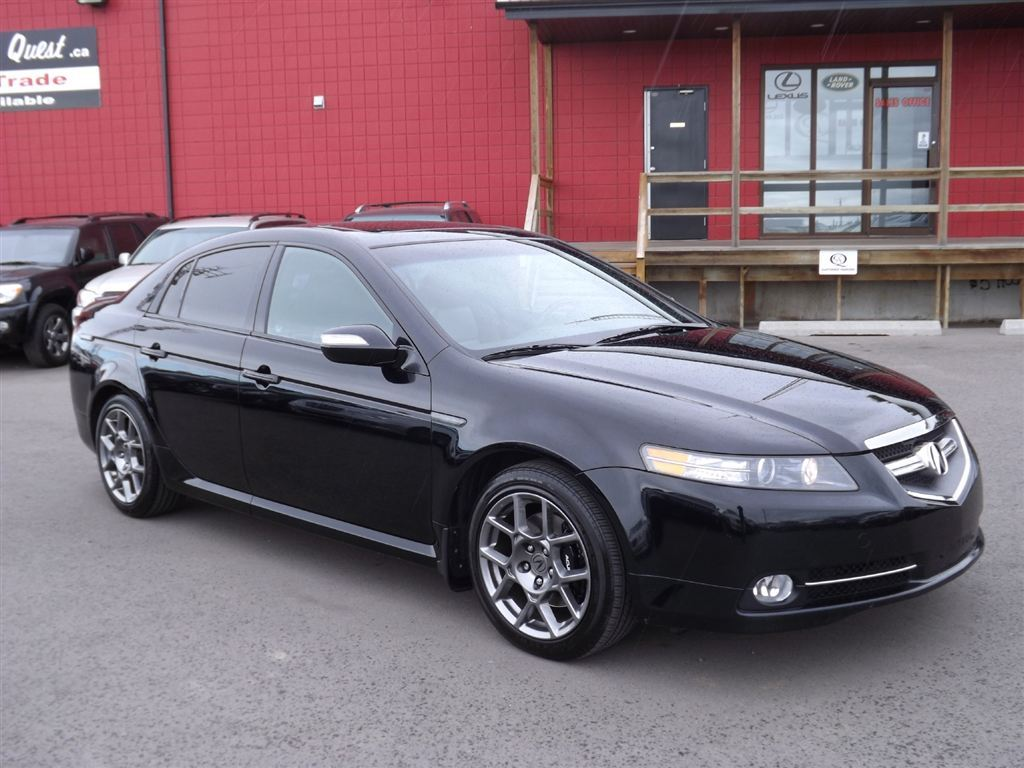

In [ ]:
#Let's look at an example of an image in the dataset.
import cv2
from google.colab.patches import cv2_imshow
randomImagePath = '/content/drive/MyDrive/Deep Learning/car_data/car_data/train/Acura TL Type-S 2008/00392.jpg'
randomImg = cv2.imread(randomImagePath)
cv2_imshow(randomImg)

In [ ]:
print(randomImg.shape)

(768, 1024, 3)


## Data Augmentation

In [ ]:
def plotAugmentations(augImages):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(augImages, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

### Test on a single image first.

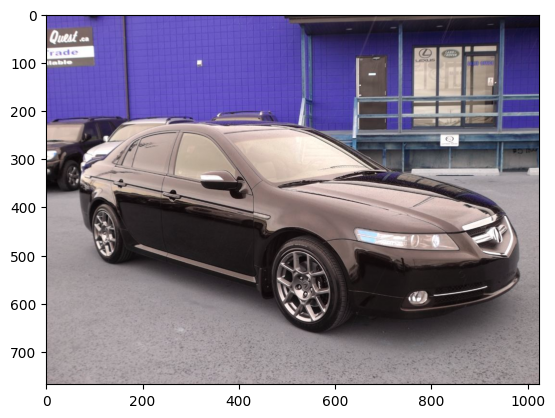

In [ ]:
#Test
image = np.expand_dims(randomImg,0)
plt.imshow(image[0])

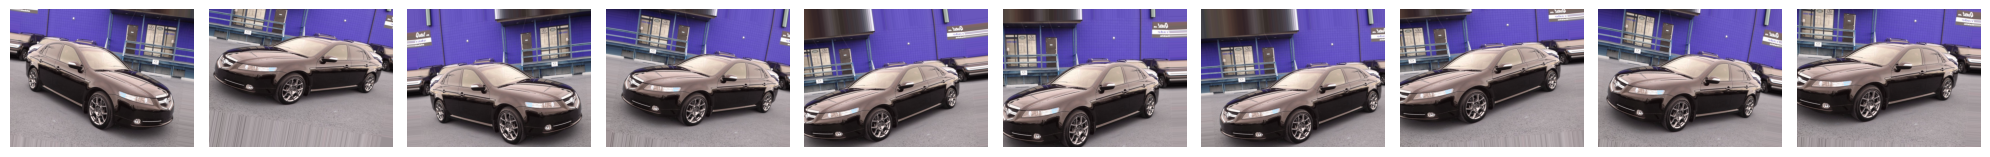

In [ ]:
dataAug = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, horizontal_flip=True)
aug_iter = dataAug.flow(image)
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]
plotAugmentations(aug_images)

### Now implement.

In [ ]:
import os
dataAug = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, horizontal_flip=True)  
trainFolder = '/content/drive/MyDrive/Deep Learning/car_data/car_data/train'
for folder in os.listdir(trainFolder):
  save_in = os.path.join(trainFolder, folder)
  for image in os.listdir(os.path.join(trainFolder, folder)):
    currentImg = os.path.join(save_in, image)
    readImg = cv2.imread(currentImg)
    im2aug = np.expand_dims(readImg,0)
    aug_iter = dataAug.flow(im2aug, save_to_dir=save_in, save_prefix='aug', save_format='jpg')
    #aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(5)]

In [ ]:
train = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning/car_data/car_data/train', labels='inferred',
    image_size=(180, 180),
    batch_size=32,
)
validation = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning/car_data/car_data/test', labels='inferred', validation_split=0.5,
    subset='training', shuffle=True,
    seed=100,
    image_size=(180, 180),
    batch_size=32,
)
test = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning/car_data/car_data/test', labels='inferred', validation_split=0.5,
    subset='validation', shuffle=True,
    seed=100,
    image_size=(180, 180),
    batch_size=32,
)

Found 8088 files belonging to 196 classes.
Found 7985 files belonging to 196 classes.
Using 3993 files for training.
Found 7985 files belonging to 196 classes.
Using 3992 files for validation.


In [ ]:
#Here are new subsets from altered dataset, moving half of the test images to the training set.
train2 = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning/Keras/car_data/car_data/train', labels='inferred',
    image_size=(180, 180),
    batch_size=32,
)
validation2 = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning/Keras/car_data/car_data/test', labels='inferred', validation_split=0.4,
    subset='training', shuffle=True,
    seed=100,
    image_size=(180, 180),
    batch_size=32,
)
test2 = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning/Keras/car_data/car_data/test', labels='inferred', validation_split=0.4,
    subset='validation', shuffle=True,
    seed=100,
    image_size=(180, 180),
    batch_size=32,
)

Found 12090 files belonging to 196 classes.
Found 3983 files belonging to 196 classes.
Using 1594 files for training.
Found 3983 files belonging to 196 classes.
Using 1593 files for validation.


In [ ]:
#Try taking validation from training.
train3 = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning/Keras/car_data/car_data/train', color_mode='grayscale', labels='inferred', validation_split=0.3,
    subset='training', shuffle=True,
    seed=100,
    image_size=(250, 250),
    batch_size=32,
)
validation3 = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning/Keras/car_data/car_data/train', color_mode='grayscale', labels='inferred', validation_split=0.3,
    subset='validation', shuffle=True,
    seed=100,
    image_size=(250, 250),
    batch_size=32,
)
test3 = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning/Keras/car_data/car_data/test', color_mode='grayscale', labels='inferred',
    image_size=(250, 250), shuffle=False,
    batch_size=32,
)

Found 12090 files belonging to 196 classes.
Using 8463 files for training.
Found 12090 files belonging to 196 classes.
Using 3627 files for validation.
Found 3983 files belonging to 196 classes.


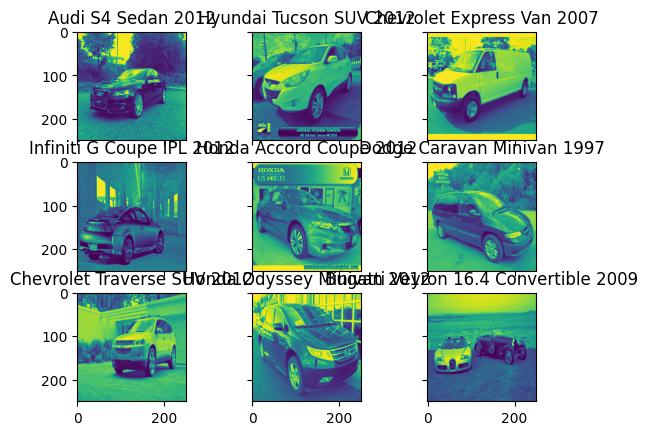

In [ ]:
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True)
 
for images, labels in validation3.take(1):
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(images[i*3+j].numpy().astype("uint8"))
            ax[i][j].set_title(validation3.class_names[labels[i*3+j]])
plt.show()

In [ ]:
#For dataset split into folders by Make:
MakeTrain = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning/SeparatedByMake/car_data/car_data/train', color_mode='grayscale', labels='inferred',
    image_size=(180, 180),
    batch_size=32,
)
MakeValidation = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning/SeparatedByMake/car_data/car_data/test', color_mode='grayscale', labels='inferred', validation_split=0.5,
    subset='training', shuffle=True,
    seed=100,
    image_size=(180, 180),
    batch_size=32,
)
MakeTest = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning/SeparatedByMake/car_data/car_data/test', color_mode='grayscale', labels='inferred', validation_split=0.5,
    subset='validation', shuffle=True,
    seed=100,
    image_size=(180, 180),
    batch_size=32,
)

Found 8144 files belonging to 48 classes.
Found 8027 files belonging to 48 classes.
Using 4014 files for training.
Found 8027 files belonging to 48 classes.
Using 4013 files for validation.


In [ ]:
#For dataset split by vehicle type (Sedan, Coupe, Van, etc.)
TypeTrain = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning/SeparatedByType/car_data/car_data/train', color_mode='grayscale', labels='inferred', validation_split=0.2,
    subset='training', shuffle=True,
    seed=100,
    image_size=(224, 224),
    batch_size=32,
)
TypeVal = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning/SeparatedByType/car_data/car_data/train', color_mode='grayscale', labels='inferred', validation_split=0.2,
    subset='validation', shuffle=True,
    seed=100,
    image_size=(224, 224),
    batch_size=32,
)
TypeTest = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning/SeparatedByType/car_data/car_data/test', color_mode='grayscale', labels='inferred',
    image_size=(224, 224), shuffle=False,
    batch_size=32,
)

Found 11289 files belonging to 9 classes.
Using 9032 files for training.
Found 11289 files belonging to 9 classes.
Using 2257 files for validation.
Found 3747 files belonging to 9 classes.


In [ ]:
#For dataset with data augmentation:
augTrain = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning/DataWithAugmentation/car_data/car_data/train', color_mode='grayscale', labels='inferred',
    image_size=(224, 224),
    batch_size=32,
)
augVal = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning/DataWithAugmentation/car_data/car_data/validation', color_mode='grayscale', labels='inferred',
    image_size=(224, 224), shuffle=False,
    batch_size=32,
)
augTest = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning/DataWithAugmentation/car_data/car_data/test', color_mode='grayscale', labels='inferred',
    shuffle=False,
    image_size=(224, 224),
    batch_size=32,
)

Found 32228 files belonging to 196 classes.
Found 3970 files belonging to 196 classes.
Found 3973 files belonging to 196 classes.


In [ ]:
#No longer need this because I am using grayscale.
#def norm(image,label):
#    image = tf.cast(image/255.,tf.float32)
#    return image,label

#train = train.map(norm)
#test = train.map(norm)


In [ ]:
#for imageBatch, labelBatch in train3:
 # for images in imageBatch:
  #  print(images)
    #for i in range(imageBatch.shape[0]):

Streaming output truncated to the last 5000 lines.
tf.Tensor(
[[[ 53.105   ]
  [ 68.39    ]
  [107.      ]
  ...
  [136.5     ]
  [153.78513 ]
  [138.5453  ]]

 [[ 54.6     ]
  [ 60.214996]
  [ 83.825   ]
  ...
  [124.6     ]
  [140.00504 ]
  [142.66995 ]]

 [[ 62.024998]
  [ 56.85    ]
  [ 69.375   ]
  ...
  [100.      ]
  [121.900024]
  [136.0246  ]]

 ...

 [[ 82.775   ]
  [ 86.149994]
  [ 88.      ]
  ...
  [ 50.125   ]
  [ 65.07492 ]
  [ 61.55005 ]]

 [[ 74.92491 ]
  [ 80.08    ]
  [ 87.85004 ]
  ...
  [ 59.30005 ]
  [ 63.810043]
  [ 59.50505 ]]

 [[ 78.050026]
  [ 86.04997 ]
  [ 92.92499 ]
  ...
  [ 62.549683]
  [ 52.129498]
  [ 63.309948]]], shape=(250, 250, 1), dtype=float32)
tf.Tensor(
[[[131.77    ]
  [138.4374  ]
  [143.931   ]
  ...
  [180.206   ]
  [174.00197 ]
  [171.25404 ]]

 [[ 88.55141 ]
  [ 88.73581 ]
  [ 84.265   ]
  ...
  [212.657   ]
  [209.09799 ]
  [212.      ]]

 [[127.6     ]
  [125.7     ]
  [126.03    ]
  ...
  [159.51    ]
  [165.85104 ]
  [169.22903 ]]

 .

KeyboardInterrupt: ignored

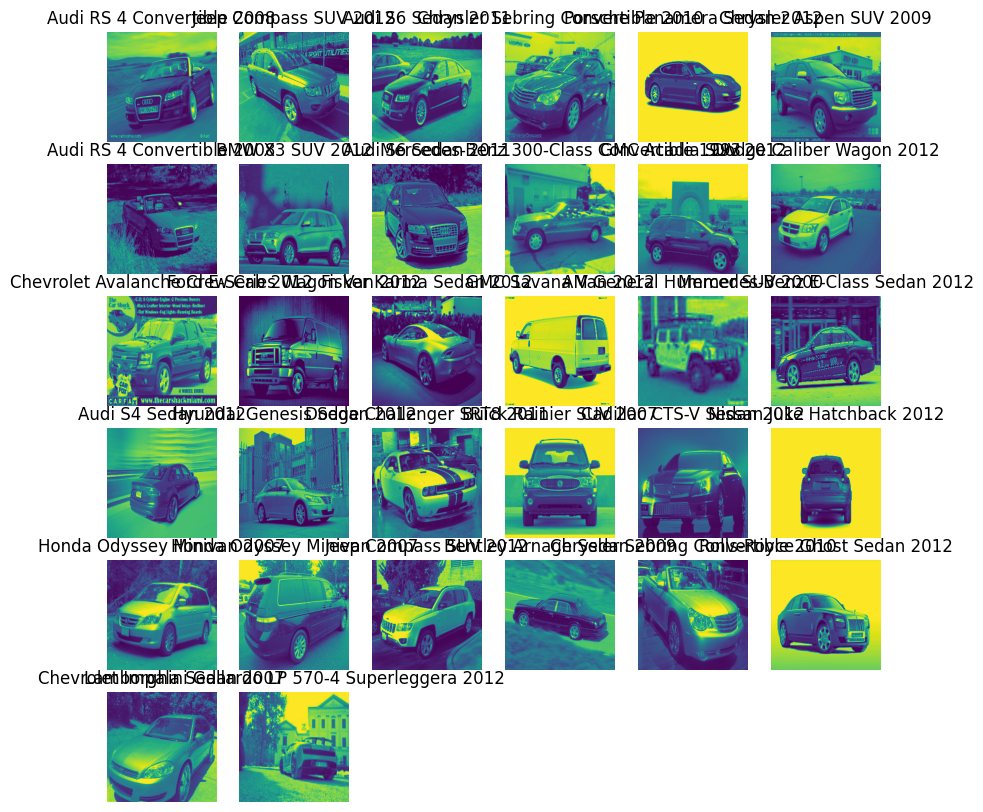

In [ ]:
plt.figure(figsize=(10, 20))
for images, labels in train3.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train3.class_names[labels[i]])
        plt.axis("off")

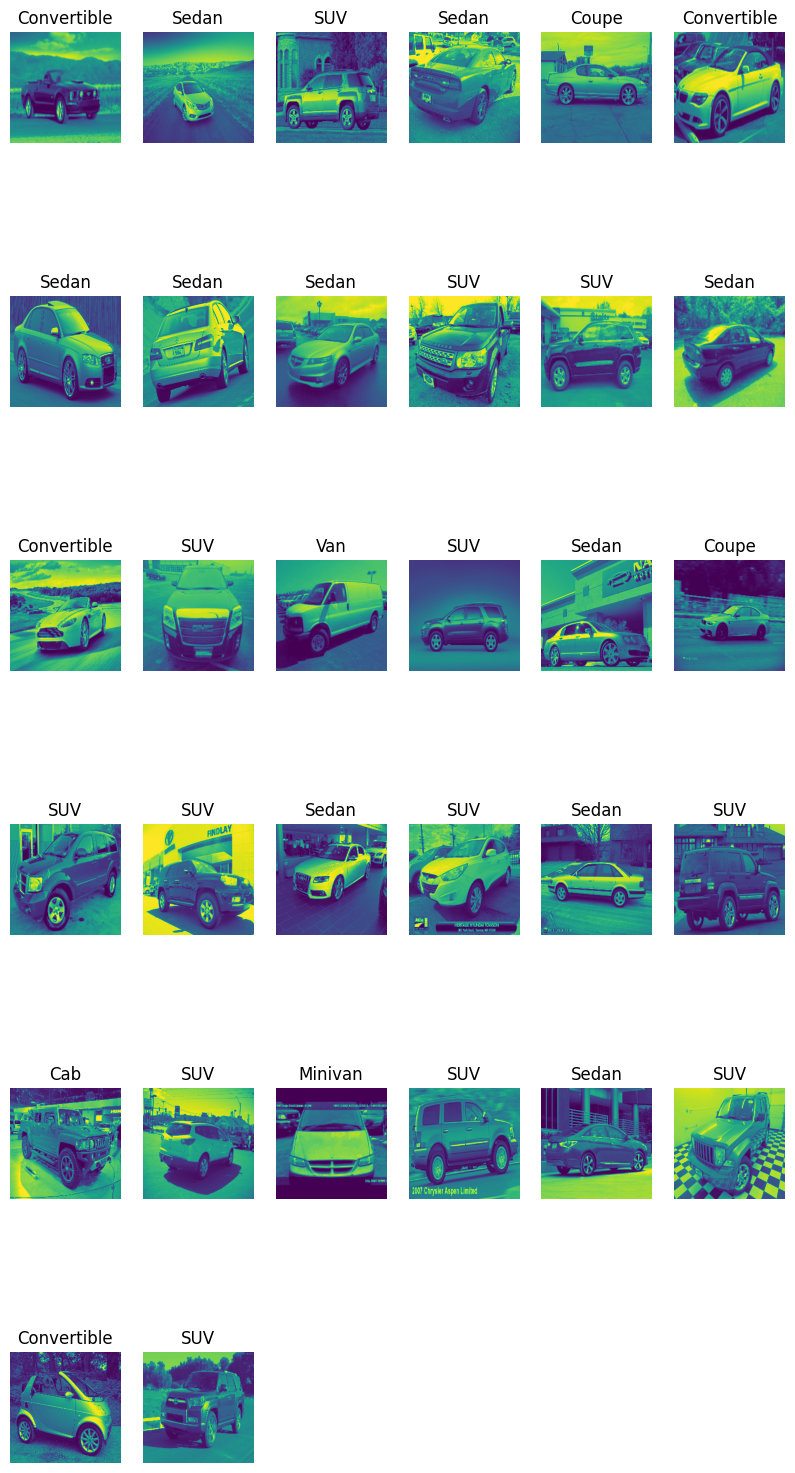

In [ ]:
#Make sure our split kept our data labeled correctly.
plt.figure(figsize=(10, 20))
for images, labels in TypeVal.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(TypeVal.class_names[labels[i]])
        plt.axis("off")

# Make Model

#### Save a copy of this document and change the model on your copy. Run your model and try to get the best accuracy.

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomTranslation(0.15,0.15)
])

In [ ]:
with tf.device(device_name):
  model = models.Sequential()
  model.add(data_augmentation)
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.25))

  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.25))

  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.25))

  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(196, activation='softmax'))

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
with tf.device(device_name):
  model.compile(optimizer=tf.keras.optimizers.Adam(3e-3),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(TypeTrain, epochs=300, validation_data=TypeVal)

Epoch 1/300
283/283 [==============================] - 54s 175ms/step - loss: 1.3983 - accuracy: 0.4770 - val_loss: 56.1709 - val_accuracy: 0.4107
Epoch 2/300
283/283 [==============================] - 49s 169ms/step - loss: 1.4327 - accuracy: 0.4746 - val_loss: 60.6579 - val_accuracy: 0.4945
Epoch 3/300
283/283 [==============================] - 50s 172ms/step - loss: 1.3922 - accuracy: 0.4828 - val_loss: 92.3323 - val_accuracy: 0.4821
Epoch 4/300
283/283 [==============================] - 48s 168ms/step - loss: 1.3908 - accuracy: 0.4823 - val_loss: 135.8217 - val_accuracy: 0.4630
Epoch 5/300
283/283 [==============================] - 49s 170ms/step - loss: 1.3768 - accuracy: 0.4888 - val_loss: 121.0331 - val_accuracy: 0.4665
Epoch 6/300
283/283 [==============================] - 50s 174ms/step - loss: 1.3946 - accuracy: 0.4848 - val_loss: 163.0965 - val_accuracy: 0.4639
Epoch 7/300
283/283 [==============================] - 49s 169ms/step - loss: 1.3840 - accuracy: 0.4891 - val_loss:

#### It looks like the model is overfitting. We could have picked a dataset that is too complex. Unless there is a solution in the CNN.

In [ ]:
#Actually just checked the folders in the train set. There are only a MAX of 45 images in each model. This might be the reason for overfitting. 
#We need more data to train with. So I am going to try to move some images from the test split to the training set. I'm not sure why it was a 50/50
#split anyway.

In [ ]:
file_paths = TypeTest.file_paths
print(file_paths)
groundTruths = []
testImages = []
for path in file_paths:
  imgFile, groundTruth, img = path.rsplit('/', 2)
  groundTruths.append(groundTruth)
  testImages.append(img)

print(groundTruths)

['/content/drive/MyDrive/Deep Learning/Keras/car_data/car_data/test/GMC Yukon Hybrid SUV 2012/03339.jpg', '/content/drive/MyDrive/Deep Learning/Keras/car_data/car_data/test/Chevrolet Malibu Hybrid Sedan 2010/06471.jpg', '/content/drive/MyDrive/Deep Learning/Keras/car_data/car_data/test/Dodge Caravan Minivan 1997/00379.jpg', '/content/drive/MyDrive/Deep Learning/Keras/car_data/car_data/test/GMC Savana Van 2012/06505.jpg', '/content/drive/MyDrive/Deep Learning/Keras/car_data/car_data/test/Acura TSX Sedan 2012/01923.jpg', '/content/drive/MyDrive/Deep Learning/Keras/car_data/car_data/test/Mazda Tribute SUV 2011/05536.jpg', '/content/drive/MyDrive/Deep Learning/Keras/car_data/car_data/test/Acura TSX Sedan 2012/07091.jpg', '/content/drive/MyDrive/Deep Learning/Keras/car_data/car_data/test/BMW M3 Coupe 2012/01149.jpg', '/content/drive/MyDrive/Deep Learning/Keras/car_data/car_data/test/Toyota 4Runner SUV 2012/00101.jpg', '/content/drive/MyDrive/Deep Learning/Keras/car_data/car_data/test/Audi T

In [ ]:
predict = model.predict(TypeTest)
print(predict)

NameError: ignored

In [ ]:
model.save('/content/drive/MyDrive/Deep Learning/SavedModels/VehicleTypeModel.hdf5')
model.save('/content/drive/MyDrive/Deep Learning/SavedModels/VehicleTypeModel.h5')